# **Business Case: Logistic Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("logistic_regression.csv?1651045921")
df.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,...,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ..."
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,...,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\r\nFPO AE 30723
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,...,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\r\nFPO AP 22690
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,...,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\r\nMauricestad, VA 00813"


## **1. Exploratory Data Analysis**

In [ ]:
df.shape

(396030, 27)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


**From describe function we can check the descriptive stastics of all numerical variable:-**


*   Loan_amnt,installment,dti,open_acc,revol_util,total_acc,mort_acc these all columns present outliers as max value is far away from mean value.
*   pub_rec and pub_rec_bankruptcies these columns has value under inter quartile range is zero. it means data points are below 25% and above 75%.



In [ ]:
df.describe(include=['object'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


**From describe function we can check unique value prents in categorical variables:-**


*   emp_length,title has large number of unique values.
*   The number of payments on the loan is maximum for 36 months
*   Maximum customer are from teacher profession who apply for loan.
emp_length unique value are 11 outoff which 10+length are maximum in number.
*   home_ownership is MORTGAGE for maximum customers.

*   Verification_status it has 3 unique value and maximum custome has their verfication_status as verified.
*   Loan_status Target variable has 2 unique value and maximum loan_status fall under Fully paid which is good sign of bussiness.

*   Purpose for loan has 14 unique category out of which "debt_consolidation" category is on top.
*   application_type Indicates whether the loan is an individual application or a joint application with two co-borrowers. maximum loan applicant are Individuals

*   Address is unique for all the customer.













In [ ]:
result=df.dtypes
col=df.columns
col_num=[]
for i in range(len(col)):
  if result[i] != 'object':
    col_num.append(col[i])
print(col_num)

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']


### **Analysis on target variable (loan_status)**

In [ ]:
df["loan_status"].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [ ]:
Fully_Paid_per=len(df[df["loan_status"] == 'Fully Paid'])/len(df)*100
print("Fully Paid loan applicant percentage = ",np.round(Fully_Paid_per,2),"%")
Charged_off_per=len(df[df["loan_status"] == 'Charged Off'])/len(df)*100
print("Charged off loan applicant percentage = ",np.round(Charged_off_per,2),"%")

Fully Paid loan applicant percentage =  80.39 %
Charged off loan applicant percentage =  19.61 %


**Fully Paid loan applicant percentage =  80.39%**

**Charged off loan applicant percentage =  19.61%**

In [ ]:
fully_paid=df[df["loan_status"]=="Fully Paid"]  #People with grades ‘B’ are more likely to fully pay their loan.
fully_paid["grade"].value_counts()              # on second number it is grade ‘C’

B    101431
C     83538
A     60151
D     45186
E     19723
F      6735
G      1593
Name: grade, dtype: int64

**People with grades ‘A’ are more likely to fully pay their loan :**- **False**

 **Because, People with grades ‘B’ are more likely to fully pay their loan.**

In [ ]:
df["emp_title"].value_counts() # The top 2 afforded job titles are Teacher and Manager.

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**The top 2 afforded job titles are Teacher and Manager.**

In [ ]:
col_cat=[]
for i in range(len(col)):
  if result[i] == 'object':
    col_cat.append(col[i])
print(col_cat)

['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


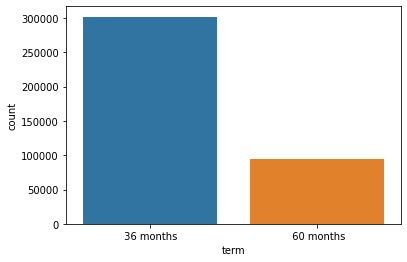

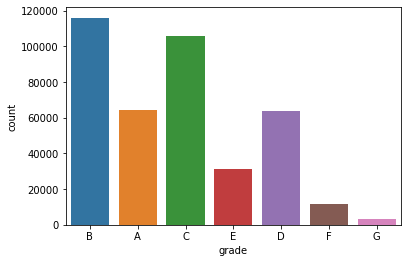

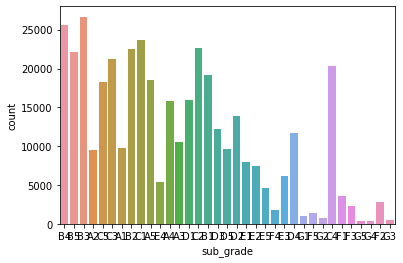

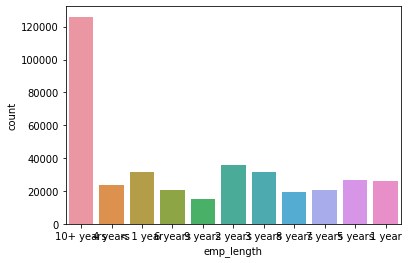

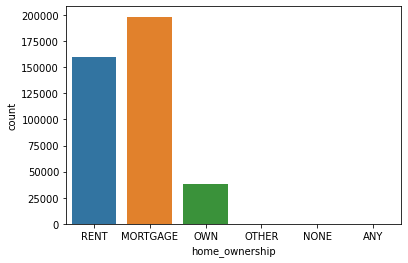

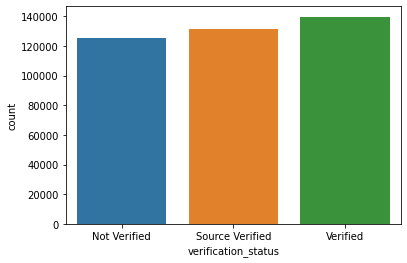

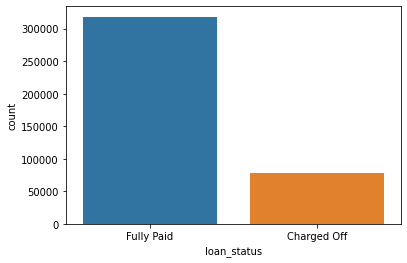

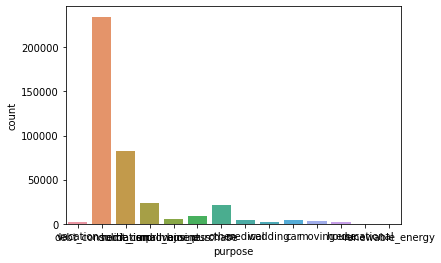

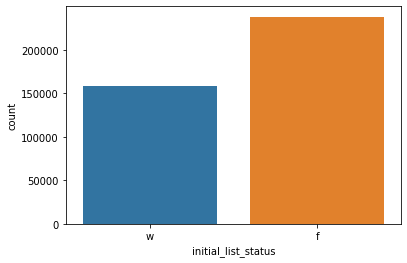

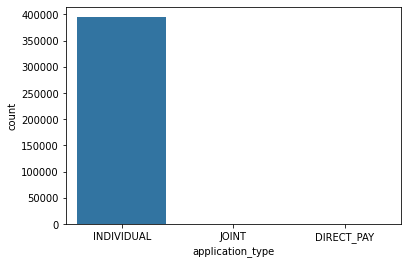

In [ ]:
col_cat_new=['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type']
for i in col_cat_new:
  fig1=sns.countplot(data=df,x=i)
  plt.show()


**Visual represntation of objective datatype variables and insights:-**


*   From count plot we can say 36 months tearm demand is more than 60 months term (term:-The number of payments on the loan. Values are in months and can be either 36 or 60)
*   grade(LoanTap assigned loan grade) maximum people count are from grade B and C.
*   sub_grade(LoanTap assigned loan subgrade) it is assign to each customer hence gives us complete sub_grade visualisation on count plot.
*   emp_length(Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years) maximum employee length is +10 years.
*   **home_ownership (The home ownership status provided by the borrower during registration or obtained from the credit report) The majority of people have home ownership as MORTGAGE**.
*   verification_status (Indicates if income was verified by LoanTap, not verified, or if the income source was verified) Maximum loan applicant status has varified but there is not as such much difference in the verified and non_verified loan applicant.
*   **loan_status (Current status of the loan - Target Variable) Fully Paid count is more than the charged off**.
*   initial_list_status (The initial listing status of the loan. Possible values are – W, F) initial_list_status is maximum for F than W.
*   application_type (Indicates whether the loan is an individual application or a joint application with two co-borrowers) maximum application_type is from individual category.












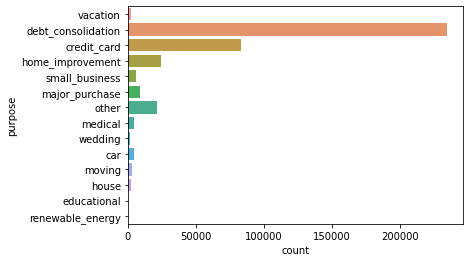

In [ ]:
sns.countplot(y ='purpose', data = df) #purpose : A category provided by the borrower for the loan request.
plt.show()                             # purpose for loan is maximum for dept_consolidation
                                       # next highest purpose for loan is for credit_card

## **Bivariate Analysis**

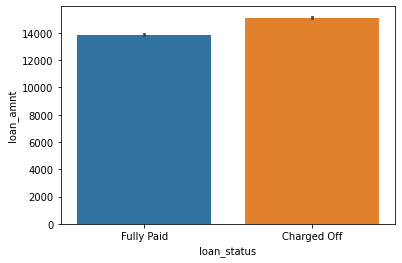

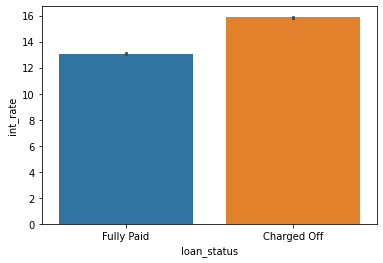

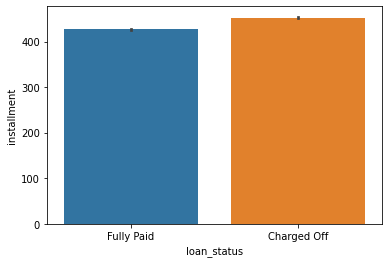

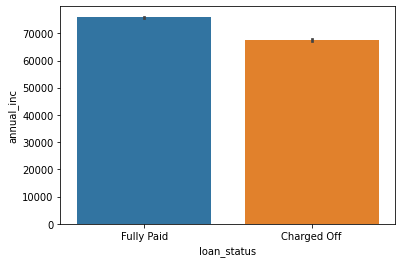

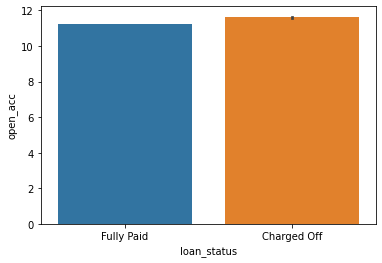

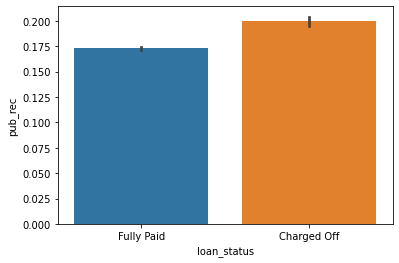

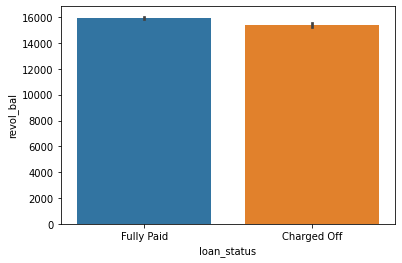

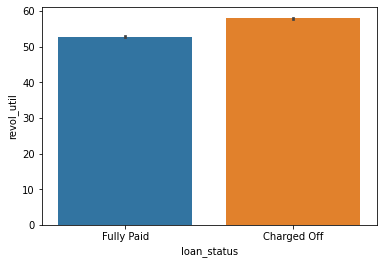

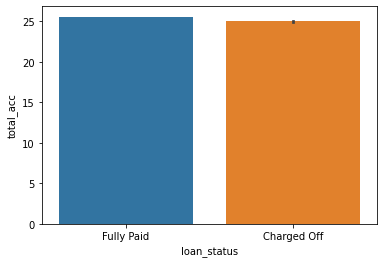

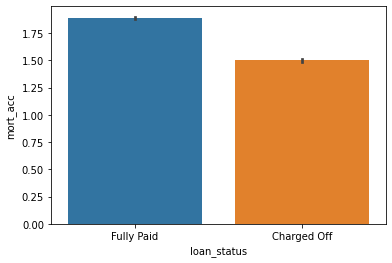

In [ ]:
x=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc']
for i in x:
  fig2=sns.barplot(x="loan_status",y=i ,data=df,estimator=np.mean)
  plt.show()

**Relation between target variable(loan_status) with some other numerical variables:-**

*   loan_amout is maximum for charged off as compaire to fully paid
*   int_rate mean for charged off is more than fully paid.

*   anualincome for fully paid loan applicant is fore than charged off.






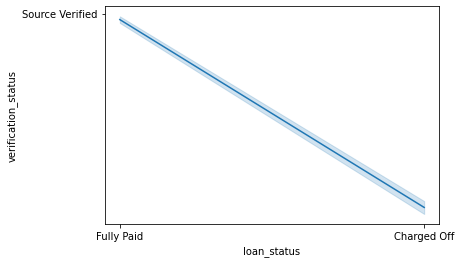

In [ ]:
sns.lineplot(x="loan_status",y="verification_status" ,data=df,estimator=np.mean) # verification_status and loan_staus are negatively correlated with each other

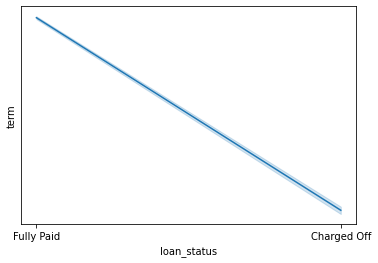

In [ ]:
sns.lineplot(x="loan_status",y="term" ,data=df,estimator=np.mean) # term and and loan_staus are negatively correlated with each other.

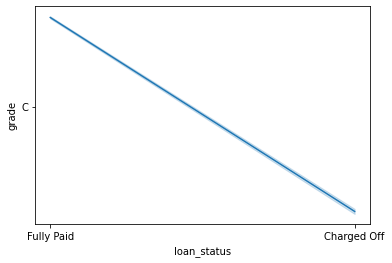

In [ ]:
sns.lineplot(x="loan_status",y="grade" ,data=df,estimator=np.mean) # grade and loan_staus are negatively correlated with each other.


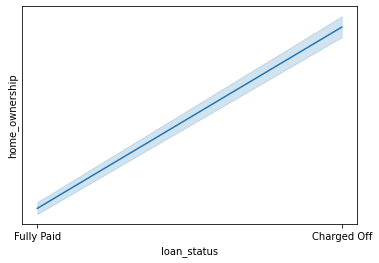

In [ ]:
sns.lineplot(x="loan_status",y="home_ownership" ,data=df,estimator=np.mean) # home_owenership and loan_staus are positively correlated with each other.


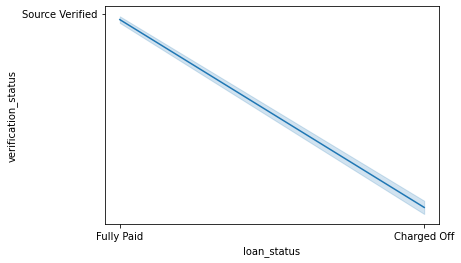

In [ ]:
sns.lineplot(x="loan_status",y="verification_status" ,data=df,estimator=np.mean) # verification_status and loan_status are negativel correlated with each other.

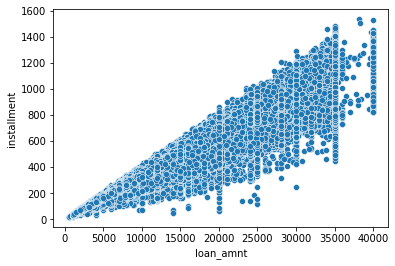

In [ ]:
sns.scatterplot(x="loan_amnt",y="installment" ,data=df,estimator=np.mean)
# scatterplot gives us the relation between two numerical data loan_amiunt and installment they are linearly correlated as loan_amt
# increase installments also increases.

From the above graph we can conclude:-

**Loan_amount and installment are positively correlated as loan amount increase then installment is also increasing.**

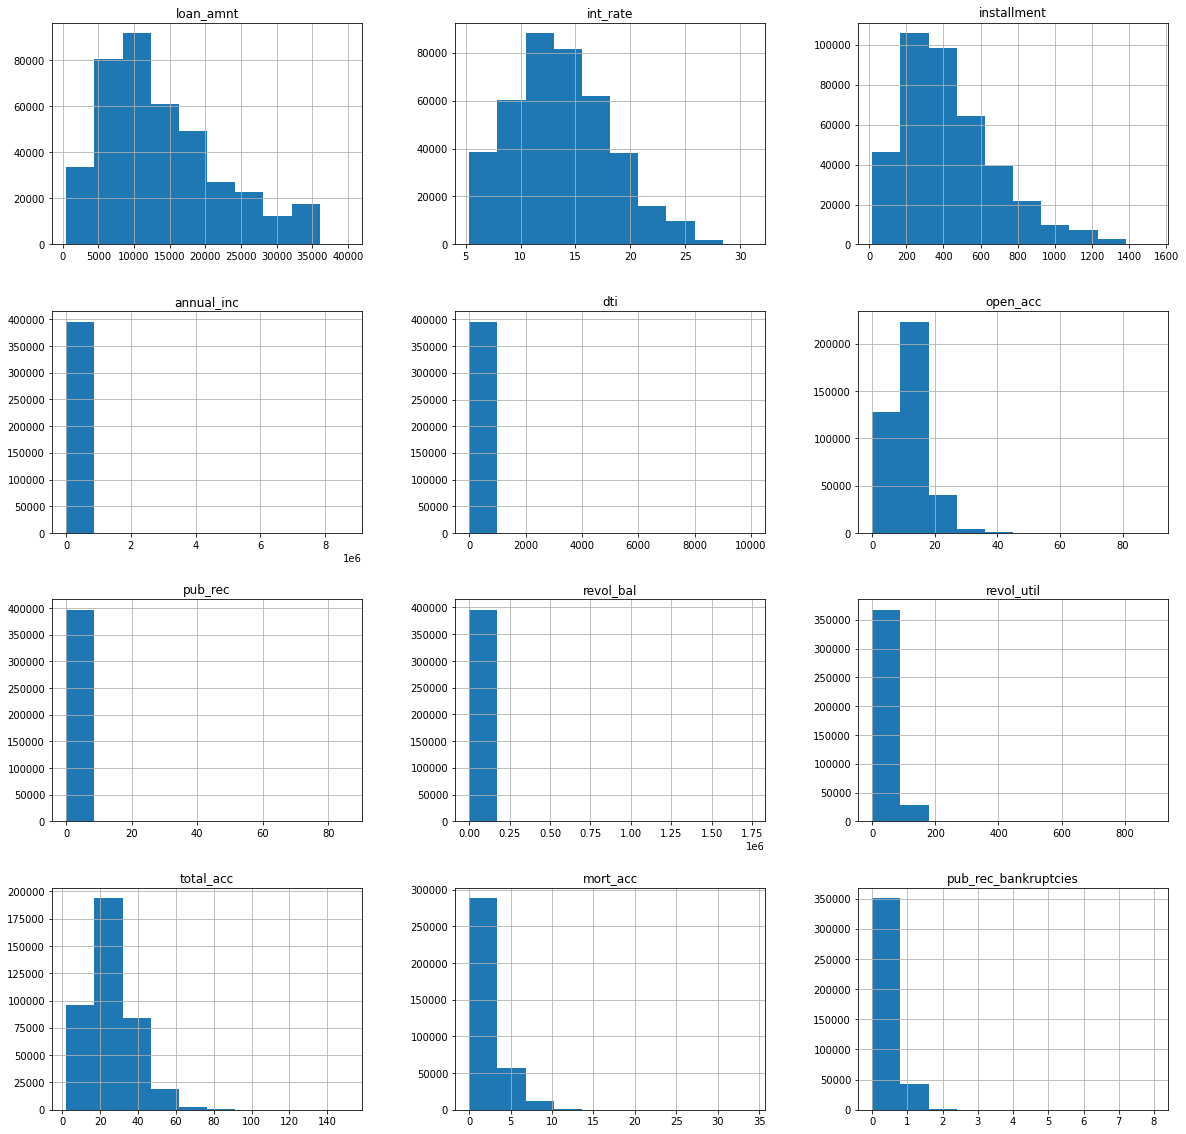

In [ ]:
df.hist(figsize = (20,20))  # Visual reprentation of all columns data distribution.
plt.show()

**From above plot we can visualise the distribution of all numerical variables**

*   'loan_amnt' and 'int_rate' is kind of showing normal distribution.
*   'installment', 'open_acc', 'total_acc' and 'mort_acc' are right skewed distributed means outliers are present.
*   'annual_inc', 'dti', 'pub_rec', 'revol_bal', 'revol_util', 'mort_acc', 'pub_rec_bankruptcies' are kind of discreate distribution.






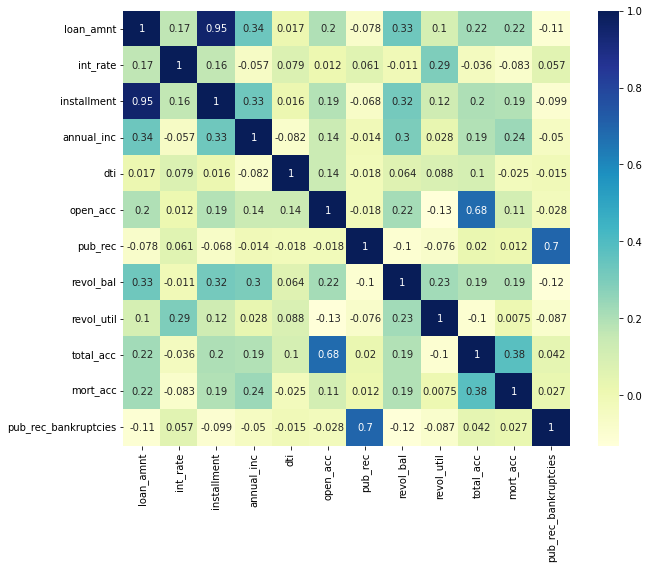

In [ ]:
plt.figure(figsize=(10,8))                               #loan amount and installment are highly positive correlated with each orher(0.95)
ax = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)   # pub_rec and pub_rec_bankruptcies are highly correlated with other(0.7)
                                                        # open_acc and total_acc are highly correlated with other(0.68)

## **Data Preprocessing**

### **1. Duplicate value check**

In [ ]:
bool_series = df.duplicated() # From value count we can see that there are zero duplicate values in the data present.
bool_series.value_counts()

False    396030
dtype: int64

In [ ]:
df.shape

(396030, 27)

### **2. Missing value treatment**

In [ ]:
df.isna().sum() #Missing value calculate in percentages

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [ ]:
def missing_to_df(df):
    #Number and percentage of missing data in training data set for each column
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    DataType = (df.dtypes).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df,DataType], axis=1, keys=['Total', 'Percent','Datatype'])
    return missing_data_df

In [ ]:
missing_df = missing_to_df(df)
missing_df[missing_df['Total'] > 0]

,Total,Percent,Datatype
mort_acc,37795,9.543469,float64
emp_title,22927,5.789208,object
emp_length,18301,4.621115,object
title,1755,0.443148,object
pub_rec_bankruptcies,535,0.135091,float64
revol_util,276,0.069692,float64


**From above missing table we can conclude something and will try to fill it with valid data:-**

*   Mort_acc has 9.5% data missing and it's type is float so we can replace it with mean.
*   pub_rec_backruptcies,revol_util prent very less anunt of data is missing we can ignore it but i am fill it with mean value.

*   emp_title,emp_length and title are object data so i am going to fill it with mode value.
*   By using SimpleImputer we can easily fill the missing data






In [ ]:
from sklearn.impute import SimpleImputer
num_missing=['mort_acc','pub_rec_bankruptcies','revol_util']
cat_missing=['emp_title','emp_length','title']

In [ ]:
# Mean imputation for some numerical columns.
median_imputer = SimpleImputer(strategy = 'median')
for col in num_missing:
    df[col] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(df[col])))

In [ ]:
# Highest Freq imputation for some categorical columns.
freq_imputer = SimpleImputer(strategy = 'most_frequent')
for col in cat_missing:
    df[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(df[col])))

In [ ]:
df.isna().sum()  # Missing data has been removed successfully

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

### **3. Outlier treatment**

In [ ]:
df.describe()  # These all numerical columns present outliers as maximum value and mean value difference is very high.

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,396030.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.792451,25.414744,1.736308,0.121483
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.443685,11.886991,2.056819,0.355962
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.900000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
col_num

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

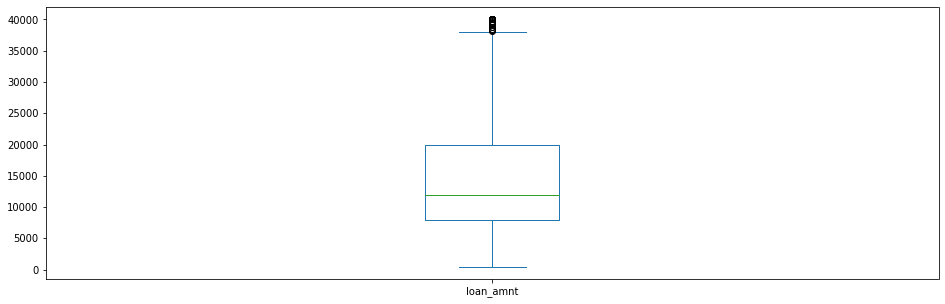

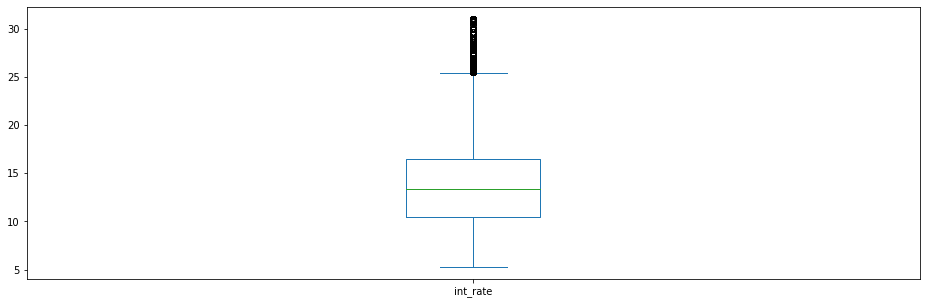

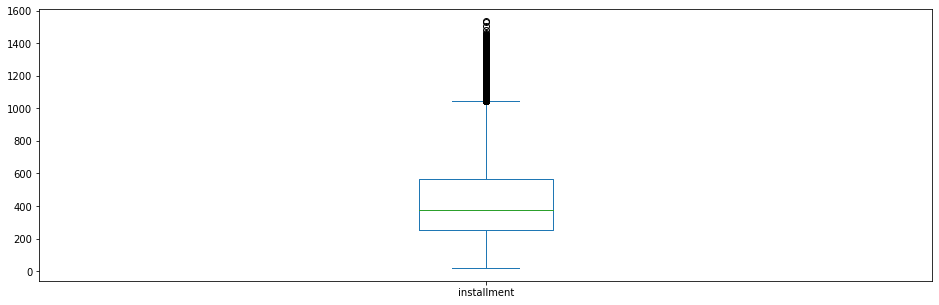

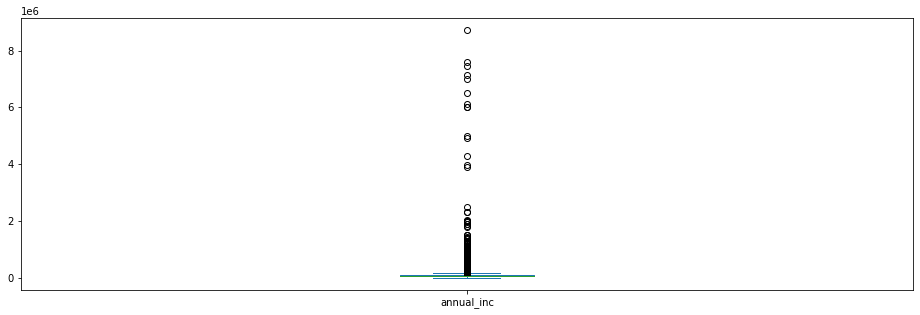

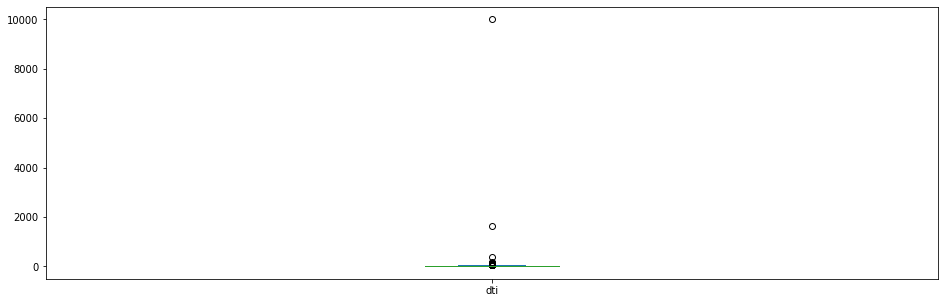

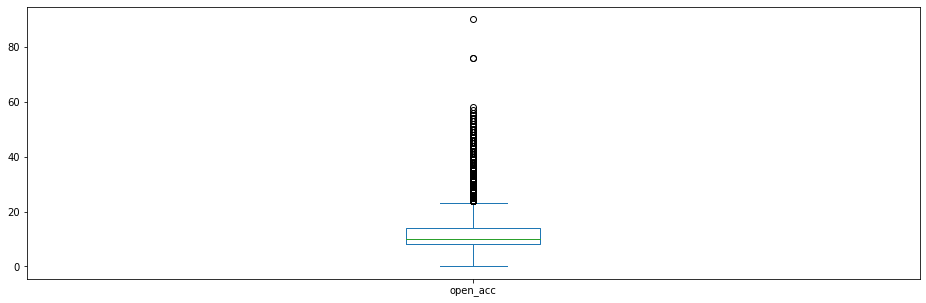

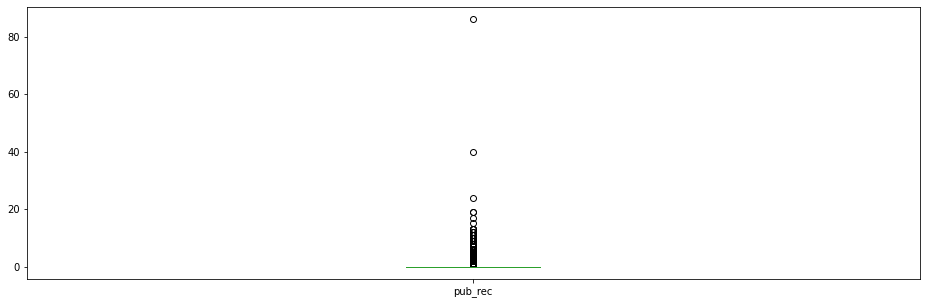

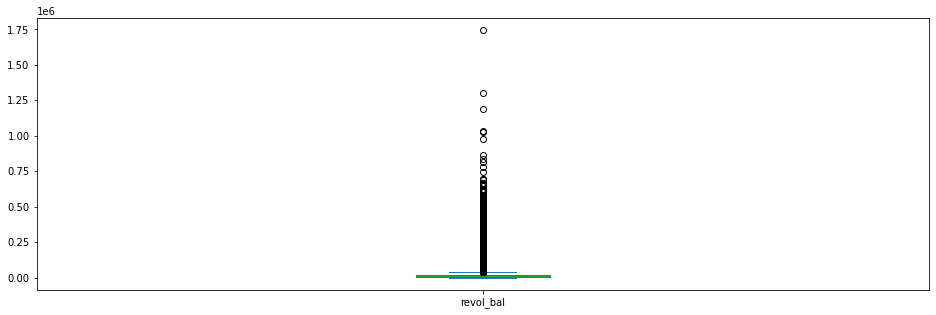

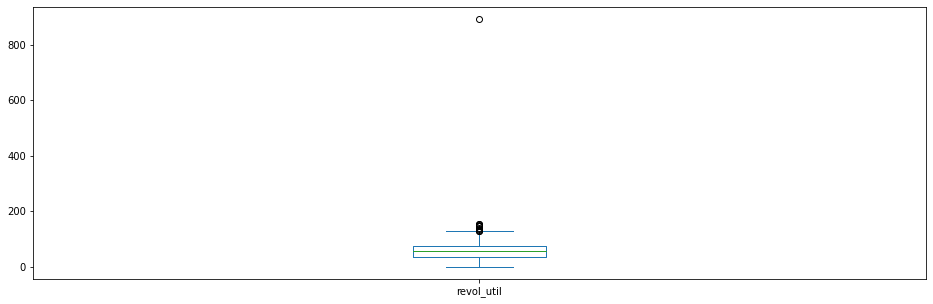

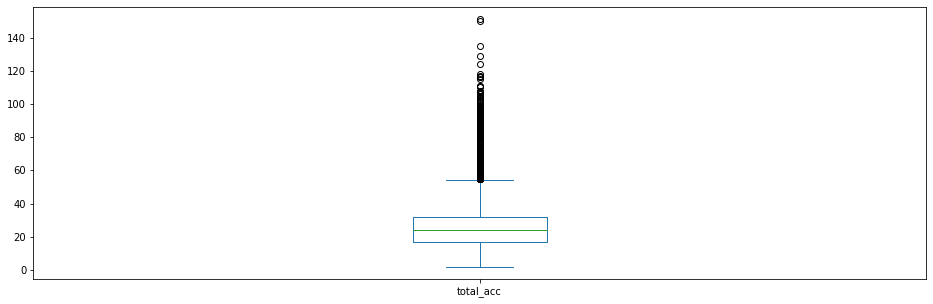

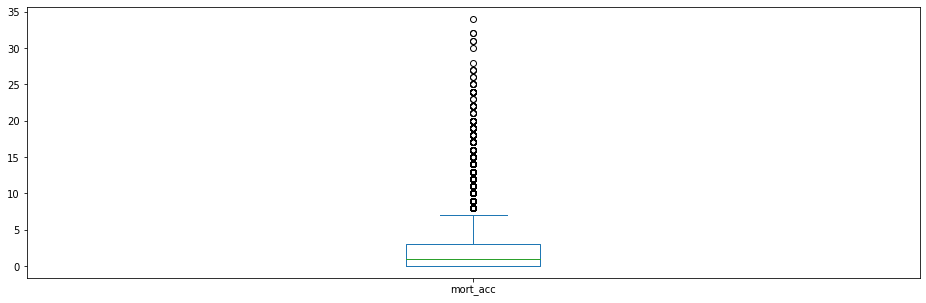

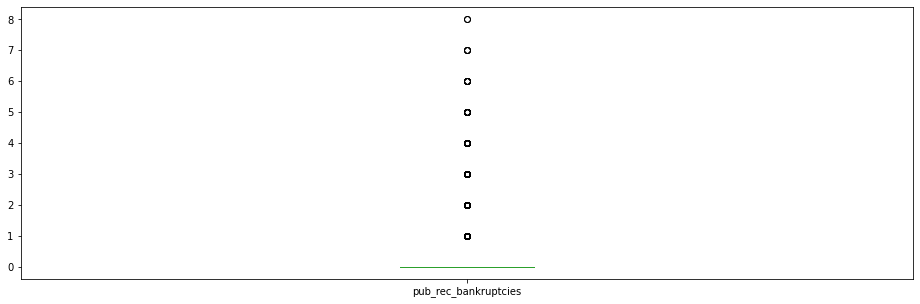

In [ ]:
for col in col_num:
  df[col].plot.box(figsize=(16,5))
  plt.show()

In [ ]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR,Q3,Q1)

loan_amnt               12000.00
int_rate                    6.00
installment               316.97
annual_inc              45000.00
dti                        11.70
open_acc                    6.00
pub_rec                     0.00
revol_bal               13595.00
revol_util                 37.00
total_acc                  15.00
mort_acc                    3.00
pub_rec_bankruptcies        0.00
dtype: float64 loan_amnt               20000.00
int_rate                   16.49
installment               567.30
annual_inc              90000.00
dti                        22.98
open_acc                   14.00
pub_rec                     0.00
revol_bal               19620.00
revol_util                 72.90
total_acc                  32.00
mort_acc                    3.00
pub_rec_bankruptcies        0.00
Name: 0.75, dtype: float64 loan_amnt                8000.00
int_rate                   10.49
installment               250.33
annual_inc              45000.00
dti                        11.28
o

In [ ]:
print((Q3+1.5*IQR)) # Above this range all are outliers.

loan_amnt                38000.000
int_rate                    25.490
installment               1042.755
annual_inc              157500.000
dti                         40.530
open_acc                    23.000
pub_rec                      0.000
revol_bal                40012.500
revol_util                 128.400
total_acc                   54.500
mort_acc                     7.500
pub_rec_bankruptcies         0.000
dtype: float64


In [ ]:
print((Q1+1.5*IQR)) #Below this range all are outliers.

loan_amnt                26000.000
int_rate                    19.490
installment                725.785
annual_inc              112500.000
dti                         28.830
open_acc                    17.000
pub_rec                      0.000
revol_bal                26417.500
revol_util                  91.400
total_acc                   39.500
mort_acc                     4.500
pub_rec_bankruptcies         0.000
dtype: float64


In [ ]:
for i in col_num:
  Q1=df.quantile(0.25)
  Q3=df.quantile(0.75)
  IQR=Q3-Q1
  upper_limit=Q3+1.5*IQR
  lower_limit=Q1-1.5*IQR
  df_new=df[(df>lower_limit) & (df<upper_limit)]

In [ ]:
df_new.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,395836.000000,392253.000000,384780.000000,379316.000000,395755.000000,382779.000000,0.0,374771.000000,396018.000000,387531.000000,389187.000000,0.0
mean,14101.245907,13.516850,410.221050,67177.554479,17.328272,10.780035,NaN,12702.161173,53.787878,24.619014,1.602186,NaN
std,8339.947616,4.313596,219.215703,29757.343579,8.094345,4.268353,NaN,9008.820738,24.403222,10.661744,1.783157,NaN
min,500.000000,5.320000,16.080000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,2.000000,0.000000,NaN
25%,8000.000000,10.360000,246.655000,45000.000000,11.280000,8.000000,NaN,5778.000000,35.900000,17.000000,0.000000,NaN
50%,12000.000000,13.330000,367.375000,61500.000000,16.900000,10.000000,NaN,10553.000000,54.800000,23.000000,1.000000,NaN
75%,20000.000000,16.290000,545.670000,85000.000000,22.965000,14.000000,NaN,17768.000000,72.900000,32.000000,3.000000,NaN
max,37900.000000,25.440000,1042.730000,157467.700000,40.520000,22.000000,NaN,40012.000000,128.100000,54.000000,7.000000,NaN


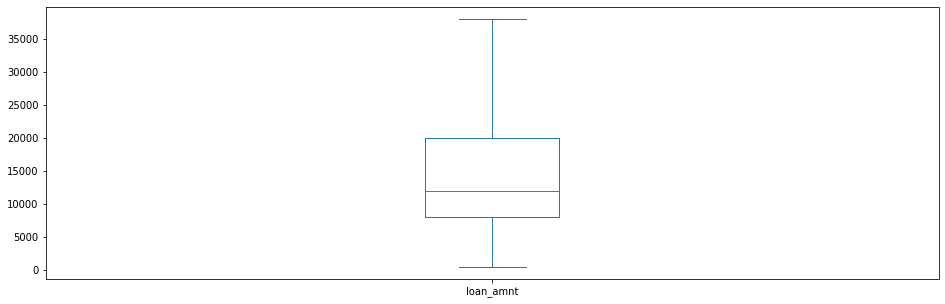

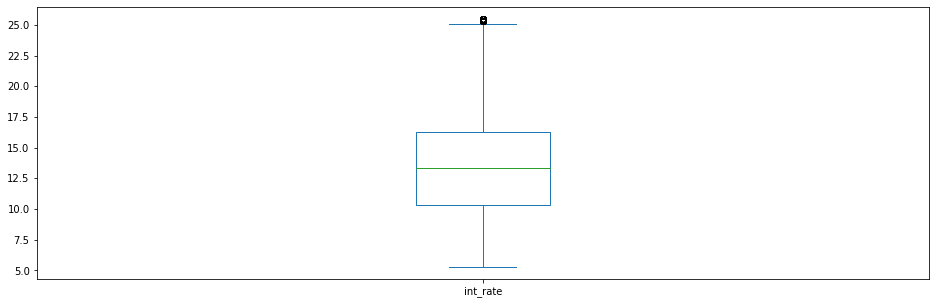

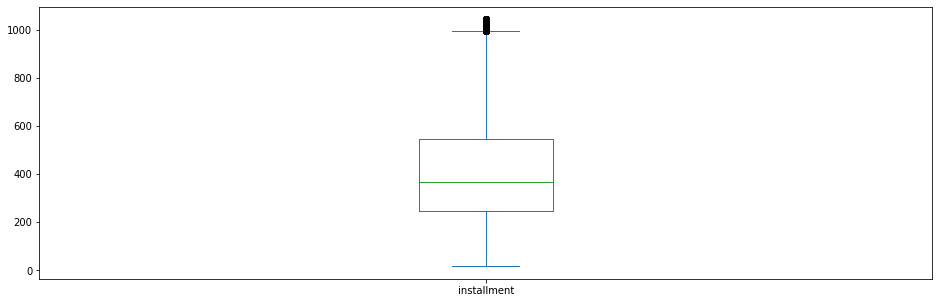

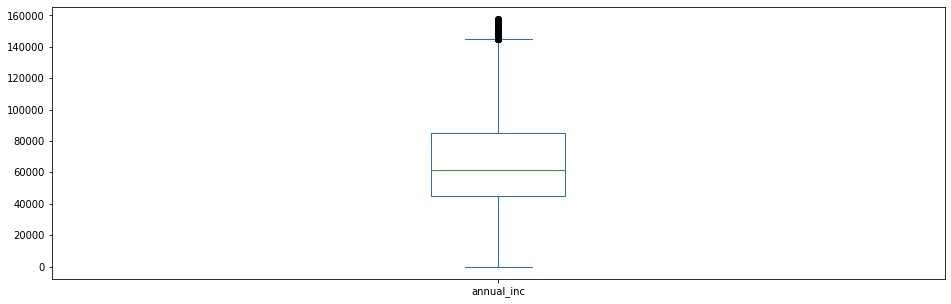

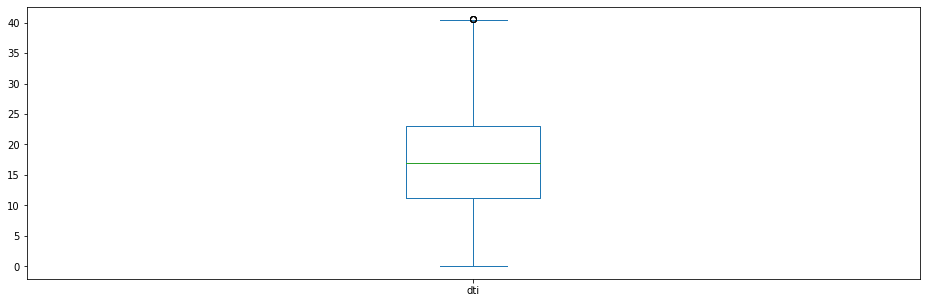

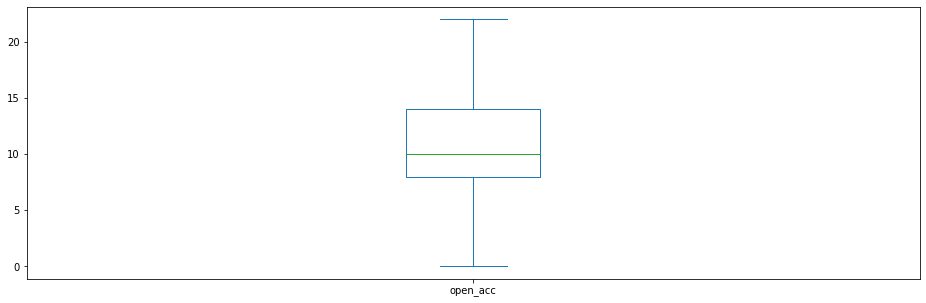

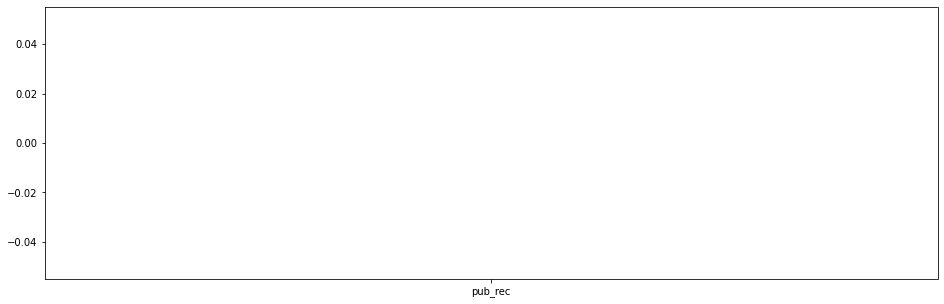

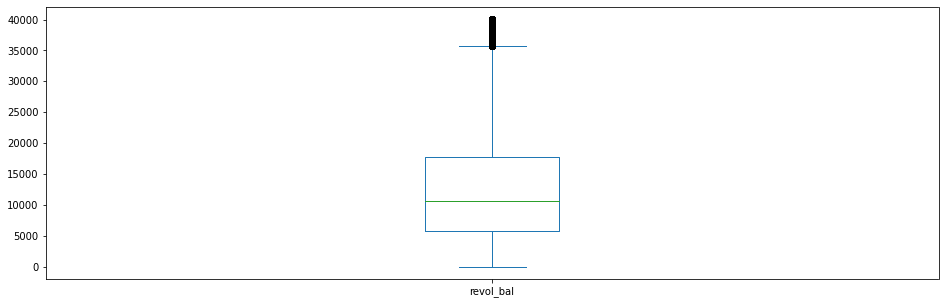

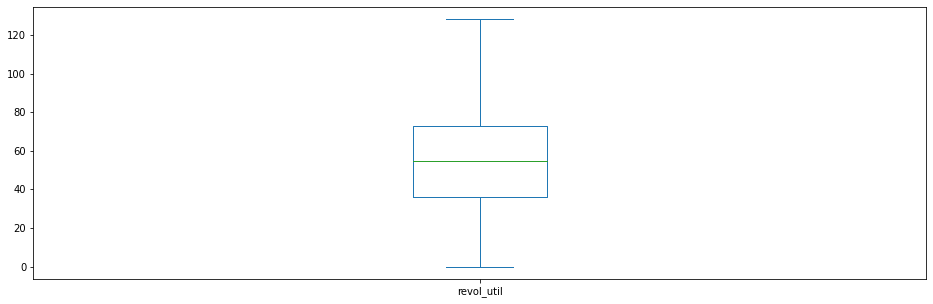

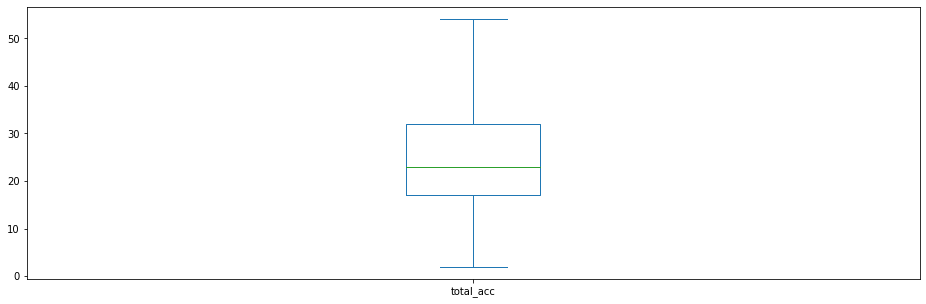

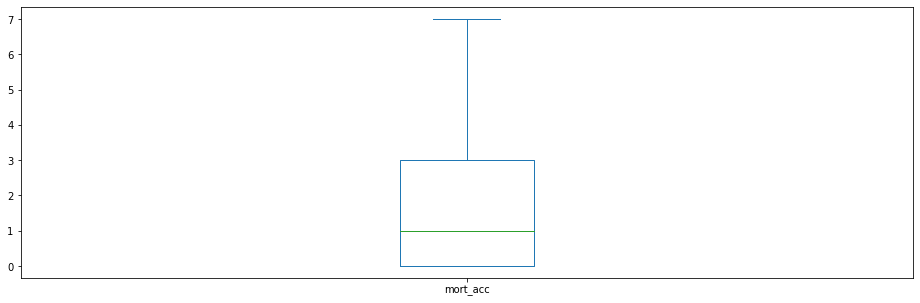

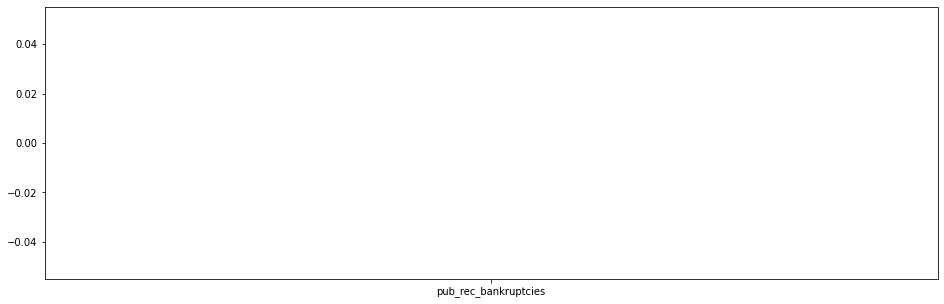

In [ ]:
for col in col_num:                      # Outlier removal check with boxplot visualisation
  df_new[col].plot.box(figsize=(16,5))   # someoutlier are still present in the new df data
  plt.show()

### **4. Feature engineering**

In [ ]:
# Some columns we can drop as it is not impacting more on out target variable such as Address
df=df.drop('address',axis=1)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0


In [ ]:
df.groupby("loan_status").mean()['annual_inc']

loan_status
Charged Off    67535.537710
Fully Paid     75829.951566
Name: annual_inc, dtype: float64

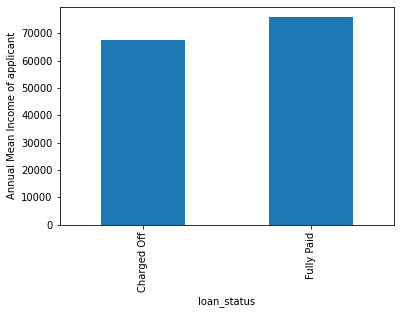

In [ ]:
df.groupby("loan_status").mean()['annual_inc'].plot.bar()
plt.ylabel("Annual Mean Income of applicant")
plt.show()

## **Bin Annual Income**

In [ ]:
bins=[0,2500,4000,6000, 8000, 10000, 20000, 40000, 81000]
group=['Low','Average','medium', 'H1', 'H2', 'H3', 'H4' , 'Very high']

In [ ]:
df['Annual_Income_bin']= pd.cut(df['annual_inc'],bins,labels=group)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,Annual_Income_bin
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,NaN
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,Very high
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,Very high
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,Very high
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,Very high


In [ ]:
pd.crosstab(df["Annual_Income_bin"],df["loan_status"]) # loan status is depend on the annual income as the annual income increases the fully piad has increases

loan_status,Charged Off,Fully Paid
Annual_Income_bin,,
Low,0,2
Average,1,1
medium,7,17
H1,10,41
H2,70,195
H3,1505,4034
H4,16658,51604
Very high,40706,159837


In [ ]:
# lets chech above table statistically significant or not by using ch2_test
from scipy.stats import chi2_contingency
val = pd.crosstab(df["Annual_Income_bin"],df["loan_status"]) .values
print(val)
chi2_contingency(val) # chi_stat, p_value, df, expected_values

[[     0      2]
 [     1      1]
 [     7     17]
 [    10     41]
 [    70    195]
 [  1505   4034]
 [ 16658  51604]
 [ 40706 159837]]


(624.9149182821103,
 1.0479203537156283e-130,
 7,
 array([[4.29265203e-01, 1.57073480e+00],
        [4.29265203e-01, 1.57073480e+00],
        [5.15118243e+00, 1.88488176e+01],
        [1.09462627e+01, 4.00537373e+01],
        [5.68776394e+01, 2.08122361e+02],
        [1.18884998e+03, 4.35015002e+03],
        [1.46512506e+04, 5.36107494e+04],
        [4.30430658e+04, 1.57499934e+05]]))

**As P_value is very low which is 0.0 it means the loan_status is highly correlated and we can say depend on annual income bins.**

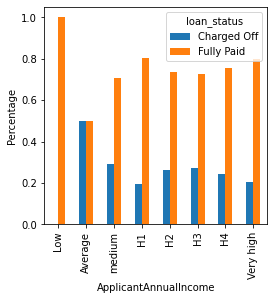

In [ ]:
Income_bin = pd.crosstab(df["Annual_Income_bin"],df["loan_status"])  # from this we can visually see that annual income has effect on loan_status

Income_bin.div(Income_bin.sum(axis=1),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantAnnualIncome")
plt.ylabel("Percentage")
plt.show()

In [ ]:
pd.crosstab(df["term"],df["loan_status"])  # count for fully paid for 36 month term is higher as compair to 60 month term

loan_status,Charged Off,Fully Paid
term,,
36 months,47640,254365
60 months,30033,63992


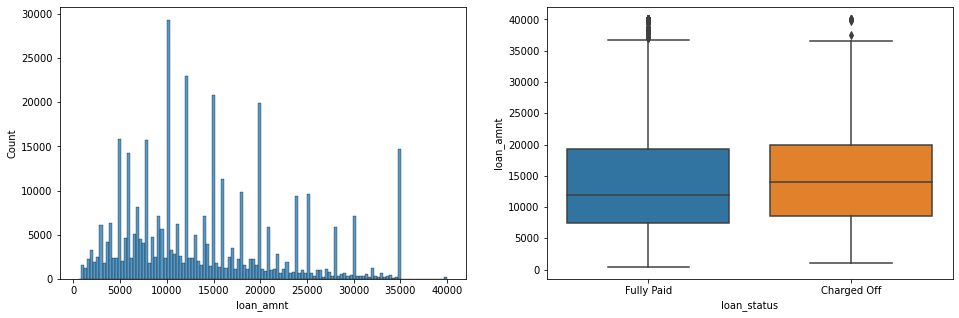

In [ ]:
plt.figure(figsize=(16,5))  ## can't see much effect on target variable loan_status
plt.subplot(121)
sns.histplot(df['loan_amnt'])

plt.subplot(122)
sns.boxplot(data=df, x='loan_status', y = 'loan_amnt')

plt.show()

In [ ]:
#df=pd.read_csv("logistic_regression.csv?1651045921")

In [ ]:
df["term"].astype(str)
new_term=df["term"].str.split(" ")
df["new_term"]=new_term[0][1]
df["new_term"]=df["new_term"].astype(int)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,Annual_Income_bin,new_term
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,NaN,36
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,Very high,36
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,Very high,36
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,Very high,36
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,Very high,36


**Feature engineering on new_term, installment and loan_amount variables**

1) let's creat new variable as total_loan_amnt from installment and terms

2) then multipling new_terms with installment and check this annual_income and loan_amount too

3) then find the new variable relation with loan_status.

In [ ]:
df["total_loan_amnt"]=df["installment"]*df["new_term"]

In [ ]:
new=pd.concat([df['loan_amnt'],df['annual_inc'],df['installment'],df['verification_status'],df['loan_status'],df["new_term"],df["total_loan_amnt"]],axis=1)
new.head()

,loan_amnt,annual_inc,installment,verification_status,loan_status,new_term,total_loan_amnt
0,10000.0,117000.0,329.48,Not Verified,Fully Paid,36,11861.28
1,8000.0,65000.0,265.68,Not Verified,Fully Paid,36,9564.48
2,15600.0,43057.0,506.97,Source Verified,Fully Paid,36,18250.92
3,7200.0,54000.0,220.65,Not Verified,Fully Paid,36,7943.40
4,24375.0,55000.0,609.33,Verified,Charged Off,36,21935.88


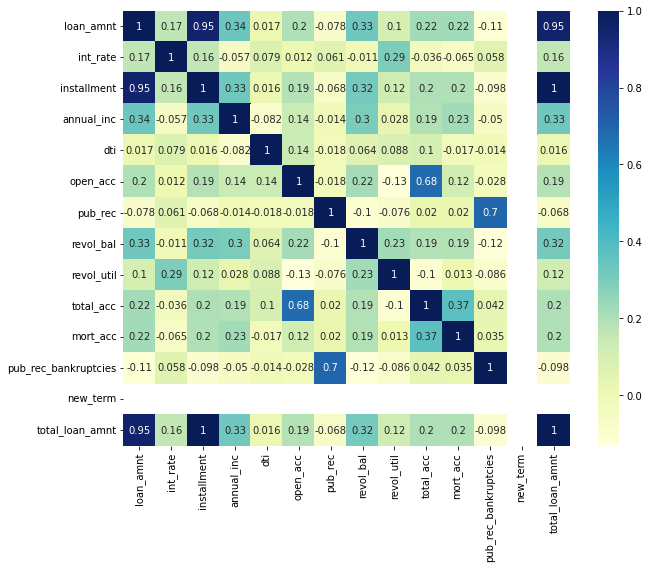

In [ ]:
plt.figure(figsize=(10,8))                              # calculated total amount and loan amount highly correlated
ax = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)  # it should gives us loan amount and total new amount correlation as 1 some data missmach we can see here.

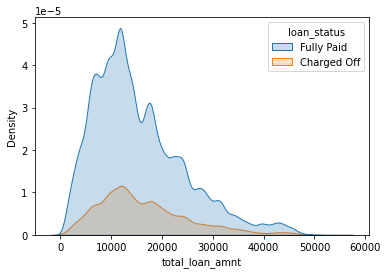

In [ ]:
sns.kdeplot(x="total_loan_amnt",data=new,hue="loan_status",shade=True)

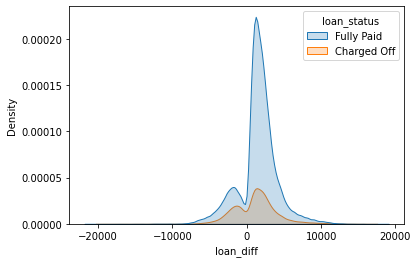

In [ ]:
#let's find the difference between calculated total_loan_amount and existed loan_amount data and find the effect on loan status
new["loan_diff"]=new["total_loan_amnt"]-new["loan_amnt"]
sns.kdeplot(x="loan_diff",data=new,hue="loan_status",shade=True) # difference is very low and fully paid has more than charged off

### **5. Data preparation for modeling**

In [ ]:
df=df.drop(['total_loan_amnt','new_term','Annual_Income_bin'],axis=1)

In [ ]:
df.shape

(396030, 26)

In [ ]:
df.info()  #let's chage some objective datatype to categorical and datetime to get appropt output
           #The object type must be changed categorically. If we do not do this, the object type may detect the string and cause errors in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             396030 non-null  object 
 7   emp_length            396030 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 396030 non-null  object 
 15  

In [ ]:
df["term"]=df["term"].astype("category")
df["grade"]=df["grade"].astype("category")
df["sub_grade"]=df["sub_grade"].astype("category")
df["emp_length"]=df["emp_length"].astype("category")
df["loan_status"]=df["loan_status"].astype("category")
df["initial_list_status"]=df["initial_list_status"].astype("category")
df["application_type"]=df["application_type"].astype("category")
df["issue_d"]=df["issue_d"].astype("datetime64[ns]")
df["earliest_cr_line"]=df["earliest_cr_line"].astype("datetime64[ns]")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  category      
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  category      
 5   sub_grade             396030 non-null  category      
 6   emp_title             396030 non-null  object        
 7   emp_length            396030 non-null  category      
 8   home_ownership        396030 non-null  object        
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  object        
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  category      
 13 

In [ ]:
df_num = df.select_dtypes(include=["float64"])
df_cat = df.select_dtypes(exclude=["float64"])

In [ ]:
df_cat.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,2015-01-01,Fully Paid,vacation,Vacation,1990-06-01,w,INDIVIDUAL
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,2015-01-01,Fully Paid,debt_consolidation,Debt consolidation,2004-07-01,f,INDIVIDUAL
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,2015-01-01,Fully Paid,credit_card,Credit card refinancing,2007-08-01,f,INDIVIDUAL
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,2014-11-01,Fully Paid,credit_card,Credit card refinancing,2006-09-01,f,INDIVIDUAL
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,2013-04-01,Charged Off,credit_card,Credit Card Refinance,1999-03-01,f,INDIVIDUAL


In [ ]:
df_cat = df_cat.drop("loan_status", axis=1)

In [ ]:
df_cat=df_cat.drop(["emp_title","issue_d","title","earliest_cr_line"],axis=1)

In [ ]:
df_cat.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,application_type
0,36 months,B,B4,10+ years,RENT,Not Verified,vacation,w,INDIVIDUAL
1,36 months,B,B5,4 years,MORTGAGE,Not Verified,debt_consolidation,f,INDIVIDUAL
2,36 months,B,B3,< 1 year,RENT,Source Verified,credit_card,f,INDIVIDUAL
3,36 months,A,A2,6 years,RENT,Not Verified,credit_card,f,INDIVIDUAL
4,60 months,C,C5,9 years,MORTGAGE,Verified,credit_card,f,INDIVIDUAL


In [ ]:
df_cat.describe()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,application_type
count,396030,396030,396030,396030,396030,396030,396030,396030,396030
unique,2,7,35,11,6,3,14,2,3
top,36 months,B,B3,10+ years,MORTGAGE,Verified,debt_consolidation,f,INDIVIDUAL
freq,302005,116018,26655,144342,198348,139563,234507,238066,395319


In [ ]:
df_num.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,396030.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.792451,25.414744,1.736308,0.121483
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.443685,11.886991,2.056819,0.355962
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.900000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scale = StandardScaler()
df_sc = scale.fit_transform(df_num)

In [ ]:
df_sc_df = pd.DataFrame(df_sc, columns=df_num.columns, index = df_num.index)

In [ ]:
df_cat_dum = pd.get_dummies(df_cat, drop_first=True)

In [ ]:
df_final = pd.concat([df_sc_df, df_cat_dum], axis=1)

In [ ]:
df_final

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,-0.492243,-0.491799,-0.408291,0.694330,0.491728,0.912646,-0.335785,0.996729,-0.490616,-0.034891,...,0,0,0,0,0,1,0,1,1,0
1,-0.731551,-0.368816,-0.662750,-0.149311,0.259197,1.107287,-0.335785,0.208163,-0.020146,0.133361,...,0,0,0,0,0,0,0,0,1,0
2,0.177819,-0.704225,0.299609,-0.505312,-0.254703,0.328720,-0.335785,-0.187334,1.571269,0.049235,...,0,0,0,0,0,0,0,0,1,0
3,-0.827274,-1.598649,-0.842348,-0.327774,-0.820215,-1.033772,-0.335785,-0.503722,-1.321098,-1.044399,...,0,0,0,0,0,0,0,0,1,0
4,1.227783,0.811824,0.707861,-0.311550,0.919608,0.328720,-0.335785,0.424414,0.654875,1.479372,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,-0.492243,-0.592422,-0.855390,-0.554908,-0.097092,-1.033772,-0.335785,-0.672818,-0.797444,-0.203142,...,0,0,0,0,0,0,0,1,1,0
396026,0.823951,-0.301734,1.071164,0.580763,0.225899,-1.033772,-0.335785,1.331523,1.714455,-1.465027,...,0,0,0,0,0,0,0,0,1,0
396027,-1.090513,-0.816028,-1.078979,-0.287214,0.010016,0.718004,-0.335785,0.818746,0.536235,-0.203142,...,0,0,0,0,0,0,0,0,1,0
396028,0.823951,0.373556,0.283855,-0.165535,-0.083218,-0.449847,-0.335785,-0.006825,0.000309,-0.455519,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_final.shape

(396030, 86)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
col='loan_status'
df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df["loan_status"].value_counts()

1    318357
0     77673
Name: loan_status, dtype: int64

# **Logistic Regression model building**

In [ ]:
X = df_final                # X=all the variables against target variable
y = df["loan_status"]       # y=target variable

In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(237618, 86)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # C = 1, lambda = 1
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.coef_

array([[ 1.43329794e-01,  3.67067200e-01, -2.01702979e-01,
         1.72158799e-01, -4.39666980e-01, -1.10957236e-01,
        -5.00537141e-02,  6.10742262e-02, -6.46071795e-02,
         1.11263842e-01,  4.86922095e-02,  3.51594849e-02,
        -5.28762445e-01, -1.24082037e+00, -1.87519339e+00,
        -2.33654553e+00, -2.73658626e+00, -3.06218493e+00,
        -3.30711974e+00, -2.64006405e-01, -5.61934436e-01,
        -7.46681749e-01, -9.22312155e-01,  9.93405828e-02,
        -9.73938110e-02, -2.49390539e-01, -4.15446792e-01,
        -5.77929811e-01, -1.06633257e-01, -2.77625197e-01,
        -3.98099058e-01, -5.05532270e-01, -5.87303606e-01,
        -2.62700187e-01, -4.03785553e-01, -4.51099445e-01,
        -5.64436581e-01, -6.54523765e-01, -3.48984171e-01,
        -4.76985563e-01, -5.21381609e-01, -6.60294292e-01,
        -7.28940625e-01, -3.74450705e-01, -5.10032546e-01,
        -6.34252749e-01, -6.80799693e-01, -8.62649232e-01,
        -5.86563438e-01, -6.52122963e-01, -8.60792310e-0

In [ ]:
df_final.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'term_ 60 months', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
       'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'emp_length_10+ years', 'emp_length_2 years',
       'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years',
 

In [ ]:
print(f'Train Accuracy:{model.score(X_train,y_train)}, Val Accuracy:{model.score(X_val,y_val) }' )

Train Accuracy:0.8052083596360545, Val Accuracy:0.8058985430396687


**Train Accuracy:0.8050021463020478**

 **Val Accuracy:0.8055450344670858**

In [ ]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 12000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = scaled_lr.score(X_train, y_train)
  val_score = scaled_lr.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)

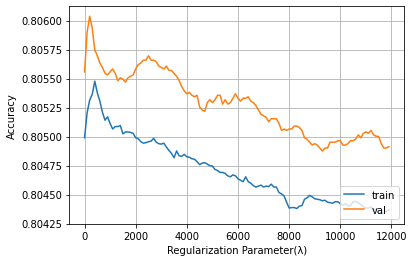

In [ ]:
plt.figure()
plt.plot(list(np.arange(0.01, 12000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 12000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
np.argmax(val_scores)   #

2

In [ ]:
val_scores[2]

0.8060374214074691

- We observe that validation score is maximum of 80.6% when index = 2, thus our $λ$ best becomes:

In [ ]:
l_best = 0.01 * 2 * 100  # The the best lamba is 2


**Lets train model with best λ=2**

In [ ]:
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best))
scaled_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=0.5))])

Weights of the model

In [ ]:
scaled_lr.named_steps['logisticregression'].coef_

array([[ 1.20875532e-01,  3.91363180e-01, -1.78692179e-01,
         1.71896628e-01, -2.11028920e-01, -1.11199243e-01,
        -4.98375851e-02,  5.81764870e-02, -6.31111344e-02,
         1.11539520e-01,  4.86943933e-02,  3.55035281e-02,
        -2.15669468e-01, -4.47433268e-01, -6.19041789e-01,
        -5.98650555e-01, -4.95554602e-01, -3.38917588e-01,
        -1.89091709e-01, -7.20259860e-02, -1.21044911e-01,
        -1.88092269e-01, -2.39557996e-01, -7.97305477e-02,
        -1.31139706e-01, -1.82798314e-01, -2.21018529e-01,
        -2.44246130e-01, -1.94681691e-01, -2.30794874e-01,
        -2.51675950e-01, -2.72246484e-01, -2.74936910e-01,
        -2.40890280e-01, -2.52270973e-01, -2.45391905e-01,
        -2.62610455e-01, -2.51607424e-01, -2.16191910e-01,
        -2.26857986e-01, -2.12097612e-01, -2.13793579e-01,
        -2.05761871e-01, -1.64522764e-01, -1.56720451e-01,
        -1.52915750e-01, -1.39819696e-01, -1.35942731e-01,
        -1.05569359e-01, -9.37224231e-02, -8.68755705e-0

Intercept weight

In [ ]:
scaled_lr.named_steps['logisticregression'].intercept_    #Intercept gives you the mean value of Y when x=0

array([1.60291973])

## **Now test this best model on our test data**

In [ ]:
test_score = scaled_lr.score(X_test,y_test) #The mean accuracy on given test data and labels
print(test_score)                           # 80.84% of data predecting correct assumption called accuracy
                                            # but this accuracy assumption is not sufficient for the imbalance data set

0.8084362295785673


### **80.84% of data predecting correct assumption called accuracy**

We can see the class label for each sample as:

In [ ]:
y_pred = scaled_lr.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
len(y_pred)

79206

In [ ]:
y_pred_prob=model.predict_proba(X_val)
print(y_pred_prob)

[[0.05569997 0.94430003]
 [0.10759703 0.89240297]
 [0.35100936 0.64899064]
 ...
 [0.42464412 0.57535588]
 [0.14205057 0.85794943]
 [0.12608314 0.87391686]]


## **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[  799, 14545],
       [  628, 63234]])

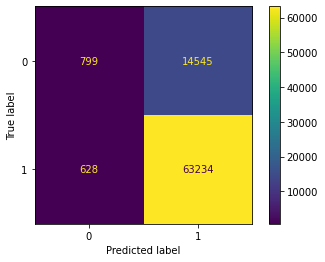

In [ ]:
ConfusionMatrixDisplay(conf_matrix).plot()

**Confusion Matrix :-**

*   Loss to business if they give loan to people who are unable to repay it (False Positive)
*   And loss if they miss out on good people who will be able to repay (False Negative)
* False positive ratio is 64.39%

* True positive ratio is 99.02%
*   False negative ratio is 0.98%

*   True negative ratio is 5.21%





## **Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.05      0.10     15344
           1       0.81      0.99      0.89     63862

    accuracy                           0.81     79206
   macro avg       0.69      0.52      0.49     79206
weighted avg       0.76      0.81      0.74     79206



**Conclusion on Classification report:-**


*   Precision is 0.81 for fully paid dataset which is good to tell us that prediction of outoff total fully paid customer actually paid customer prediction is more.
*   recall for fully paid customer is 99% which is also good that bank will not provide for terms to the customer thore are charged off.

*  F1 score is good 0.89 on fully paid which is good.







## **Accuracy from confusion matrix**

In [ ]:
(np.diag(conf_matrix).sum() / conf_matrix.sum())*100  # This accuracy is not sufficient enoght to the model performance.
                                                      # hence we chech the other classification matrix.

80.84362295785674

**This accuracy is not sufficient enoght to the model performance hence we chech the other classification matrix**

## **Precision Score**

In [ ]:
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred)
print("Precision Score is = ",np.round(precision,2))

Precision Score is =  0.81


**Precision score is 0.81 and precision score helps us to find the not correctly predict fully paid customer out off total fully paided customers**

**Out off all the fully paided customer how many are redicted correctly is called precision and which is 0.81**

## **Recall Score**

In [ ]:
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred)
print("Recall Score is = ",np.round(recall,2))

Recall Score is =  0.99


**Recall score is 0.99 and precision score helps us to find the correct fully paided customer out off total actually fully paid customer.**

**Here the recall is almost giving very good prediction but it telling 1% of customer charged off but they actually fully paid.**

## **F1** **Score**

In [ ]:
from sklearn.metrics import f1_score
f1score=f1_score(y_test,y_pred)
print("F1 Score is = ",np.round(f1score,2))

F1 Score is =  0.89


**Loss to business if they give loan to people who are unable to repay it (False Positive)**

**Also a loss if they miss out on good people who will be able to repay (False Negative)**

**Since we have to focus on both False Postivie as well as False Negatives, we use both Precision and Recall**

**In our case we want both precision and recall should be high to get the profit on provinding the loan and collecting it on time.**

**F1_score is 0.89 which is good as both precision and recall is high for our model hence it is giving high f1-score**

## **ROC AUC Curve**

## **ROC curve**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [ ]:
fpr, tpr, thr = roc_curve(y_test, y_pred)

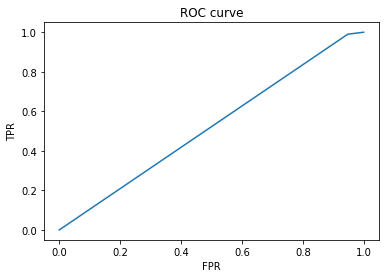

In [ ]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)  # Area under the curve shuld be more than 0.5 for the good model

0.5211193837001049

**For all threshold values it is giving us same FPR and TPR this is happening because of the data splitted 50-50**

**AU- ROC doesn't work well on extremely imbalanced data**

# **Precision - Recall curve**

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
precision, recall, thr = precision_recall_curve(y_test, y_pred)

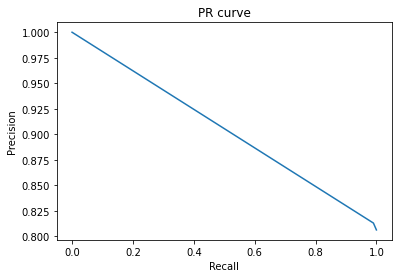

In [ ]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

0.9055453920635266

**Our data in Loan tap is highly imbance hence in this case we can use the precision recall curve for the bettwer understanding of model.**

**The area under this curve is called AU-PRC, Area under precision recall curve, which is a very good metric for very highly imbalanced data.**

**Here the area under the curve is 0.9 which is good to conclude.**

# **Tradeoff Questions**
1.How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it

**Ans:-** 1. Common method used to decrease cases like false negatives or false positives is changing the decision boundary line. The basic decision boundary line in binary classification models is 0.5. When the y value is greater than 0.5, the prediction is considered True or else false.

2.We make sure that our model can detect real defaulters and there are less false positives from Precision recall curve. it is giving us area under this curve as 91% which gives us maximum true dection of the individuals from the test data. From confusion matrix we get to know the count of false positive and we can find the false positive ratio also here it is 64%. data is highly imbance hence gives us the FP little high to reduse it we should get the balance data to increase the performance of model.

2.Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.

**Ans:-** Some valide insights to get to know value customers:-

1)Annual income is correlated with the loan_status hence from this bank can deciside to whom they should provide loan.

2)if term is for 36 months then there are high chanses of fully pay.

3)emp_length unique value are 11 outoff which 10+length are maximum in number.

4)home_ownership is MORTGAGE for maximum customers.

5)Verification_status it has 3 unique value and maximum custome has their verfication_status as verified.

6)Loan_status Target variable has 2 unique value and maximum loan_status fall under Fully paid which is good sign of bussiness.

7)Purpose for loan has 14 unique category out of which "debt_consolidation" category is on top.

8)application_type Indicates whether the loan is an individual application or a joint application with two co-borrowers. maximum loan applicant are Individuals

## **Actionable Insights & Recommendations:-**



*   Fully paid has 36 months term hence, banck can insist customer for 36 months term loan.
*   Maximum customer are teacher and manager by profession who apply for loan.bank can focus these two find customer are there potential customers.

*   Those who has MORTGAGE home_ownership bank can provide them loan because maximum who fully paid are having moryage home_ownership.

*   Loan_status Target variable has 2 unique value and maximum loan_status fall under Fully paid which is good sign of bussiness.

*   Purpose for loan has 14 unique category out of which "debt_consolidation" category is on top. so, bank can do more marketing on this category.

* Maximum loan applicant are Individuals hence bank can get in touch with these value customer to increase there customer count.



## **Questionnaire:-**

1.What percentage of customers have fully paid their Loan Amount?
**Ans:-** **Fully Paid loan applicant percentage = 80.39%**

2.Comment about the correlation between Loan Amount and Installment features.**Ans:- Comment about the correlation between Loan Amount and Installment features is positively correlated with each other as loan amount increases installment also get increase**

3.The majority of people have home ownership as _______.
**Ans:- MORTGAGE**

4.People with grades ‘A’ are more likely to fully pay their loan. (T/F)
**Ans:-False. because, People with grades ‘B’ are more likely to fully pay their loan**

5.Name the top 2 afforded job titles. **Ans:- Teacher and Manager**

6.Thinking from a bank's perspective, which metric should our primary focus be on..
1.ROC AUC
2.Precision
3.Recall
4.F1 Score
**Ans:- (4)F1 Score. because, in this bank sinario we want both recision and recall should be high and only f1 score can gives us this two term high.**

7.How does the gap in precision and recall affect the bank?**Ans:-Your precision is the hit rate of loan payers while recall is the capture rate of loan payers. The higher the precision the less likely it is to recruit defaulters, but the potential client pool becomes smaller. The higher the recall, the larger the potential pool of clients but the higher the risk of recruiting defaulters. The balance of our recall and precision levels is a matter of risk appetite**

8.Which were the features that heavily affected the outcome? **Ans:- Annual income,verification, job_title, loan_reason these feature ars heavily affected the outcomes.**

9.Will the results be affected by geographical location? (Yes/No) **Ans:- NO.**

